In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

*Load the dataset*

In [2]:
# Load the training and testing datasets
train_df = pd.read_csv('mnist_train.csv')
test_df = pd.read_csv('mnist_test.csv')

# Separate features and labels
X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values
X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

*Preprocess the data*

In [3]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

*TraintheModel*

In [4]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

*Evaluate*

In [5]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.95      0.99      0.97      1135
           2       0.95      0.94      0.94      1032
           3       0.92      0.95      0.94      1010
           4       0.95      0.94      0.95       982
           5       0.93      0.93      0.93       892
           6       0.97      0.97      0.97       958
           7       0.94      0.93      0.93      1028
           8       0.96      0.90      0.93       974
           9       0.93      0.92      0.92      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.94      0.94     10000
weighted avg       0.95      0.95      0.95     10000

[[ 967    0    1    3    0    4    5    0    0    0]
 [   0 1127    3    0    1    0    3    0    1    0]
 [  12    9  967   15    2    0    5   11    9    2]
 [   0    4    5  963    2   14    0   12    8    2]
 [   1    9    5    2  922   

*Visualize*

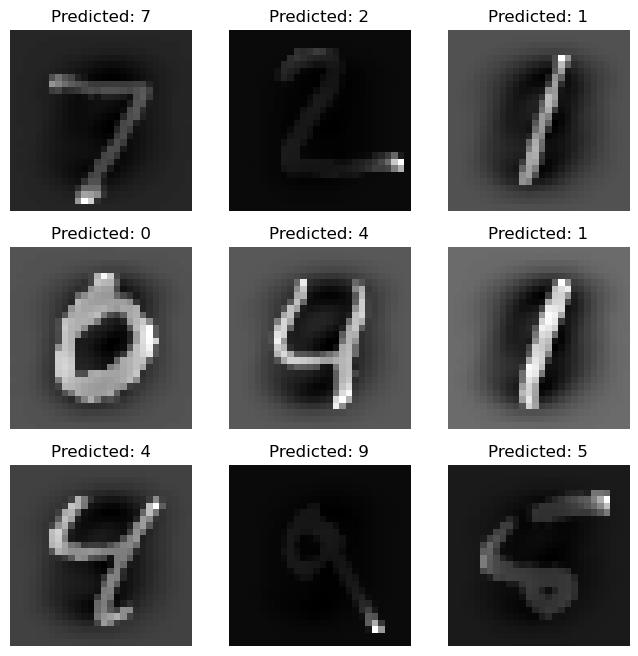

In [6]:
# Visualize some predictions
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=plt.cm.binary, interpolation="nearest")
    plt.axis("off")

# Plot a few test images with their predicted labels
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.flatten()
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"Predicted: {y_pred[i]}")
    ax.axis("off")

plt.show()
